In [37]:
import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import makeData as md
import analysis_updated as up

%matplotlib inline

DATA_PATH = './data/'
DATA_SET_CSV = 'dataset.csv'
#psparser 실행
#md.run_psparser(os.path.join(DATA_PATH, "clean/"))
#md.run_psparser(os.path.join(DATA_PATH, "malicious/"))

#makeData에 있는 함수를 사용하여 데이터 프레임 만들기
test_scripts =md.labeling(DATA_PATH)
#총 샘플의 수
print("총 샘플의 수: ", len(test_scripts))

# 각 항목의 결측값 개수 파악
test_scripts.isnull().sum().to_frame('Null')


총 샘플의 수:  20224


,Null
name,0
code,179
sentiment,0


In [38]:
#결측값 제거하기
test_scripts.dropna(axis = 0, how = 'any', subset = None,inplace=True)
test_scripts.reset_index(drop=True,inplace=True)
  
#총 샘플의 수
print("총 샘플의 수: ", len(test_scripts))


총 샘플의 수:  20045


In [39]:
#범주형 데이터 살펴보기
test_scripts.describe(include='O')


,name,code
count,20045,20045
unique,20043,15530
top,test.ps1.txt,New-Object System.Net.WebClient Start-Process
freq,2,1373


In [40]:

#중복이 둘디 제거 버전
#inplace=True 기존 데이터 프레임 변경
test_scripts.drop_duplicates(subset=['code'], inplace=True)
test_scripts.reset_index(drop=True,inplace=True)


#총 샘플의 수
print("총 샘플의 수: ", len(test_scripts))
#test_scripts

총 샘플의 수:  15530


In [41]:
#히스토그램으로 코드의 분포 살펴보기 전
#코드 길이가 0인것이 있다면 지우기
code_length = test_scripts['code'].apply(len)   #code_length의 타입은 시리즈
#길이 0인거 제거하자
zero_length = np.where(code_length == 0)[0]
if len(zero_length) != 0:  
    test_scripts.drop(zero_length, axis = 0, inplace=True)
    test_scripts.reset_index(drop=True,inplace=True) #인덱스 재정비
    
#여기서 소문자, 1 제거 함수 불러오기
test_scripts = up.lower_case(test_scripts)
#잘 됐는지 확인하기 위해 출력
print(test_scripts.loc[15500, 'code'])

function _setcertpolicy add-type -typedefinition new-object -typename trustallcertspolicy


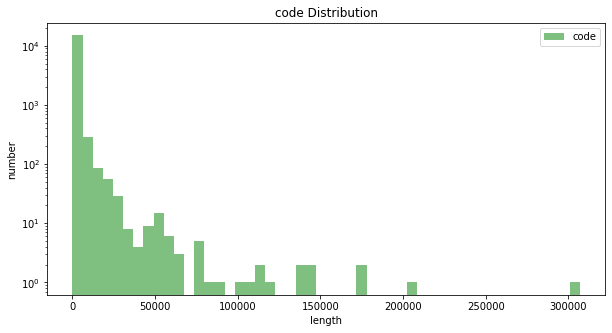

In [42]:
#히스토그램으로 코드의 분포 살펴보기
code_length = test_scripts['code'].apply(len) 
plt.figure(figsize=(10,5))

plt.hist(code_length, bins = 50, alpha = 0.5, color='g', label ='code') 
plt.title('code Distribution')
plt.yscale('log')
plt.legend()
plt.xlabel('length') #길이
plt.ylabel('number') #개수 (이거 한글로 바꾸려면 깨져서 따로 처리해야)
plt.show()

In [43]:
#코드의 분포를 통계값으로 나타내보자
#code_length.describe() <- 한번에 확인 가능
print("평균값 : {:.2f}".format(code_length.mean()))
print("표준편차 : {:.2f}".format(code_length.std()))
print("최댓값 :", code_length.max())
print("최솟값 :", code_length.min())
print("1/2지점에 위치하는 코드의 길이 :", code_length.median())
print("1/4지점에 위치하는 코드의 길이 :", np.percentile(code_length,25)) #제1사분위
print("3/4지점에 위치하는 코드의 길이 :", np.percentile(code_length,75)) #제3사분위

평균값 : 1459.16
표준편차 : 6018.02
최댓값 : 306862
최솟값 : 0
1/2지점에 위치하는 코드의 길이 : 484.0
1/4지점에 위치하는 코드의 길이 : 238.0
3/4지점에 위치하는 코드의 길이 : 1073.0


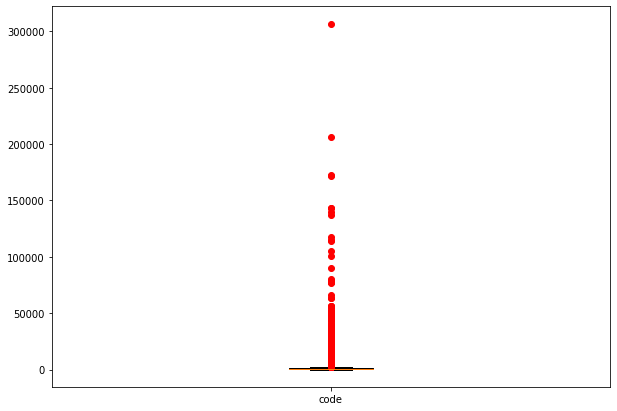

In [44]:
#이상치를 확인하고 싶음
plt.figure(figsize=(10,7))
plt.boxplot([code_length],labels=['code'],sym='r')  
plt.show()

In [45]:
#이상치 찾는 함수 이 부분 고민중 아직 건들지마셈
def find_outlier(code_length):
    q1 = np.percentile(code_length,25) #제 1사분위
    q3 = np.percentile(code_length,75) #제 3사분위
    iqr = q3 - q1  #IQR 값
    lower = q1 - (1.5*iqr) #최솟값
    upper = q3 + (1.5*iqr) #최댓값
    print("lower :", lower)
    print("upper :", upper)
    return np.where((code_length < lower) | (code_length > upper))

outlier = find_outlier(code_length)[0]

print("이상치 개수 :",code_length.loc[outlier].count()) #이상치 개수 출력


#길이 0인거 제거하자
zero_length = np.where(code_length == 0)[0]
if len(zero_length) != 0:  
    test_scripts.drop(zero_length, axis = 0, inplace=True)
    test_scripts.reset_index(drop=True,inplace=True) #인덱스 재정비

lower : -1014.5
upper : 2325.5
이상치 개수 : 1697


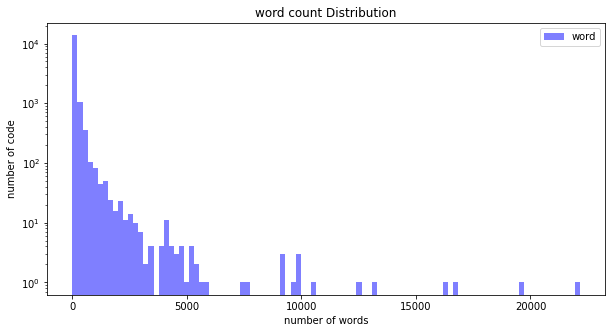

In [46]:
#단어 개수 분포를 히스토그램으로 살펴보자
#word_count의 타입은 시리즈

word_count = test_scripts['code'].apply(lambda x:len(x.split()))   
plt.figure(figsize=(10,5))
#나중에 bins와 alpha 조정해서 바꾸기
plt.hist(word_count, bins = 100, alpha = 0.5, color='b', label = 'word') 
plt.yscale('log')
plt.legend()
plt.title('word count Distribution')
plt.xlabel('number of words') #단어 개수
plt.ylabel('number of code') #코드 개수 (이거 한글로 바꾸려면 깨져서 따로 처리해야)
plt.show()

In [47]:
#단어 개수 분포를 통계값으로 나타내보자
#word_count.describe() <- 한번에 확인 가능
print("평균값 : {:.2f}".format(word_count.mean()))
print("표준편차 : {:.2f}".format(word_count.std()))
print("최댓값 :", word_count.max())
print("최솟값 :", word_count.min())
print("중앙값 :", word_count.median())
print("1/4지점에 위치하는 단어의 개수 :", np.percentile(word_count,25)) #제1사분위
print("3/4지점에 위치하는 단어의 개수 :", np.percentile(word_count,75)) #제3사분위

평균값 : 142.40
표준편차 : 520.64
최댓값 : 22150
최솟값 : 1
중앙값 : 51.0
1/4지점에 위치하는 단어의 개수 : 25.0
3/4지점에 위치하는 단어의 개수 : 113.0


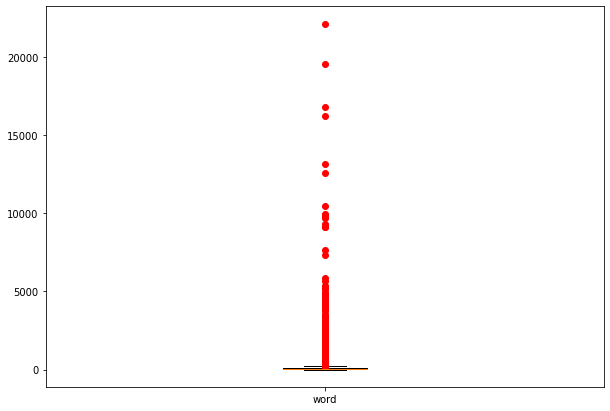

In [48]:
#이상치를 확인하고 싶음
plt.figure(figsize=(10,7))
plt.boxplot([word_count],labels=['word'],sym='r')  
plt.show()

In [49]:
#단어 개수 10000이상인거 제거하자.
max_length = np.where(word_count > 10000)[0]
print(len(max_length)) #단어 개수 10000이상인 스크립트 개수

test_scripts =test_scripts.drop(max_length, axis = 0) #inplace=True 기존 데이터 프레임 변경
test_scripts.reset_index(drop=True,inplace=True) #인덱스 재정비

7


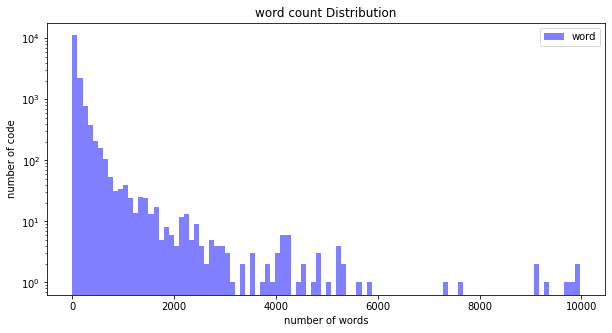

In [50]:
#제거 후 어떻게 변했는 지 단어 개수 분포를 히스토그램으로 살펴보자
word_count = test_scripts['code'].apply(lambda x:len(x.split()))   
plt.figure(figsize=(10,5))

plt.hist(word_count, bins = 100, alpha = 0.5, color='b', label = 'word') 
plt.yscale('log')
plt.legend()
plt.title('word count Distribution')
plt.xlabel('number of words') #단어 개수
plt.ylabel('number of code') #코드 개수 (이거 한글로 바꾸려면 깨져서 따로 처리해야)
plt.show()

In [51]:
#단어 개수 분포를 통계값으로 나타내보자
#word_count.describe() <- 한번에 확인 가능
print("평균값 : {:.2f}".format(word_count.mean()))
print("표준편차 : {:.2f}".format(word_count.std()))
print("최댓값 :", word_count.max())
print("최솟값 :", word_count.min())
print("중앙값 :", word_count.median())
print("1/4지점에 위치하는 단어의 개수 :", np.percentile(word_count,25)) #제1사분위
print("3/4지점에 위치하는 단어의 개수 :", np.percentile(word_count,75)) #제3사분위

평균값 : 135.31
표준편차 : 391.43
최댓값 : 9967
최솟값 : 1
중앙값 : 51.0
1/4지점에 위치하는 단어의 개수 : 25.0
3/4지점에 위치하는 단어의 개수 : 112.75


In [52]:
outliers = find_outlier(word_count)[0]
print("이상치 개수 :",word_count.loc[outliers].count()) 
outlier_ratio = (word_count.loc[outliers].count()/len(test_scripts))*100
print("이상치 값의 비율 : {:.2f}%".format(outlier_ratio))
outlier_set = test_scripts.loc[outliers]
print("정상 스크립트 중 이상치 개수 :", outlier_set['sentiment'].value_counts()[0])
print("악성 스크립트 중 이상치 개수 :", outlier_set['sentiment'].value_counts()[1])

lower : -106.625
upper : 244.375
이상치 개수 : 1642
이상치 값의 비율 : 10.58%
정상 스크립트 중 이상치 개수 : 1540
악성 스크립트 중 이상치 개수 : 102


In [53]:

#정상과 악성 개수
print("정상 스크립트 개수 :", test_scripts['sentiment'].value_counts()[0])
print("악성 스크립트 개수 :", test_scripts['sentiment'].value_counts()[1])
print()

#정상, 악성 비율
print("정상 스크립트의 비율 : {:.2f}%".format(test_scripts['sentiment'].value_counts()[0]/len(test_scripts)*100))
print("악성 스크립트의 비율 : {:.2f}%".format(test_scripts['sentiment'].value_counts()[1]/len(test_scripts)*100))

정상 스크립트 개수 : 14516
악성 스크립트 개수 : 1002

정상 스크립트의 비율 : 93.54%
악성 스크립트의 비율 : 6.46%


In [36]:
#파일로 저장하는 부분 만들기
#데이터셋을 csv파일로 저장하기 
test_scripts.to_csv(DATA_PATH + DATA_SET_CSV, index = False)
